# Identify And Answer Questions

---

# Mục lục

[I. Đặt câu hỏi](#i-dch)

[II. Trả lời câu hỏi](#ii-tlch)
- [1. Import](#1-import)
- [2. Load dữ liệu](#2-ldl)
- [3. Phân tích](#3-pt)
    - [Q1: Đối tác tổ chức khóa học nào thường đưa ra những khóa học phù hợp với chủ đề cụ thể nào mà người học quan tâm?](#q1)
    - [Q2:](#q2)
    - [Q3:](#q3)
    - [Q4:](#q4)

---

## I. Đặt câu hỏi <a id="i-dch"></a>

- Đối tác tổ chức khóa học nào thường đưa ra những khóa học phù hợp với chủ đề cụ thể nào mà người học quan tâm?

- 

- 

-

---

## II. Trả lời câu hỏi <a id="ii-tlch"></a>

### 1. Import <a id="1-import"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import re
import seaborn as sns

### 2. Load dữ liệu <a id="2-ldl"></a>

In [2]:
df = pd.read_csv('./data/processed_data.csv')
df.head()

,Unnamed: 0,partner,course,skills,rating,reviewcount,level,certificatetype,duration,crediteligibility
0,0,Google,Google Cybersecurity,"{"" Network Security"","" Python Programming"","" L...",4.8,16400.0,Beginner,Professional Certificate,3 - 6 Months,False
1,1,Google,Google Data Analytics,"{"" Data Analysis"","" R Programming"","" SQL"","" Bu...",4.8,133400.0,Beginner,Professional Certificate,3 - 6 Months,True
2,2,Google,Google Project Management:,"{"" Project Management"","" Strategy and Operatio...",4.8,97300.0,Beginner,Professional Certificate,3 - 6 Months,True
3,3,Google,Google Digital Marketing & E-commerce,"{"" Digital Marketing"","" Marketing"","" Marketing...",4.8,21400.0,Beginner,Professional Certificate,3 - 6 Months,False
4,4,Google,Google IT Support,"{"" Computer Networking"","" Network Architecture...",4.8,181400.0,Beginner,Professional Certificate,3 - 6 Months,True


### 3. Phân tích <a id="3-pt"></a>

#### Q1: Đối tác tổ chức khóa học nào thường đưa ra những khóa học phù hợp với chủ đề cụ thể nào mà người học quan tâm? <a id="q1"></a>

**Ý nghĩa câu hỏi:** Câu hỏi giúp cung cấp thông tin về sự phù hợp giữa các đối tác và chủ đề khóa học, giúp người học lựa chọn thông minh, tiết kiệm thời gian và đảm bảo chất lượng khi chọn khóa học phù hợp với nhu cầu trên nền tảng Coursera.

*Ví dụ:* Người sử dụng nền tảng muốn tập trung vào chủ đề công nghệ có thể tham khảo các khóa học của Google.

**Trước tiên, ta tìm hiểu sơ về các đối tác cung cấp khóa học trên coursera.**

In [3]:
partners = df['partner'].unique()
print(f'Số lượng đối tác cung cấp khóa học trên Coursera là {partners.shape[0]}.')

Số lượng đối tác cung cấp khóa học trên Coursera là 180.


In [4]:
# tính số khóa học mà các đối tác cung cấp
partner_count = df['partner'].value_counts().reset_index()
for partner in partner_count.values:
    print(f'- {partner[0]} _ {partner[1]} khóa học.')

- Google _ 97 khóa học.
- IBM _ 82 khóa học.
- University of Pennsylvania _ 56 khóa học.
- DeepLearning.AI _ 43 khóa học.
- University of Michigan _ 42 khóa học.
- Google Cloud _ 38 khóa học.
- University of Colorado Boulder _ 38 khóa học.
- University of Illinois at Urbana-Champaign _ 33 khóa học.
- Johns Hopkins University _ 26 khóa học.
- University of London _ 26 khóa học.
- Duke University _ 26 khóa học.
- Stanford University _ 23 khóa học.
- University of California, Irvine _ 22 khóa học.
- Meta _ 20 khóa học.
- University of California, Davis _ 18 khóa học.
- Microsoft _ 18 khóa học.
- Yale University _ 17 khóa học.
- University of Virginia _ 16 khóa học.
- Pontificia Universidad Católica de Chile _ 13 khóa học.
- Rice University _ 12 khóa học.
- Imperial College London _ 11 khóa học.
- University of Illinois _ 10 khóa học.
- Berklee _ 10 khóa học.
- University of California San Diego _ 10 khóa học.
- Vanderbilt University _ 9 khóa học.
- Georgia Institute of Technology _ 9 khóa

**Trực quan hóa sự đóng góp của top 10 đối tác trên nền tảng coursera.**

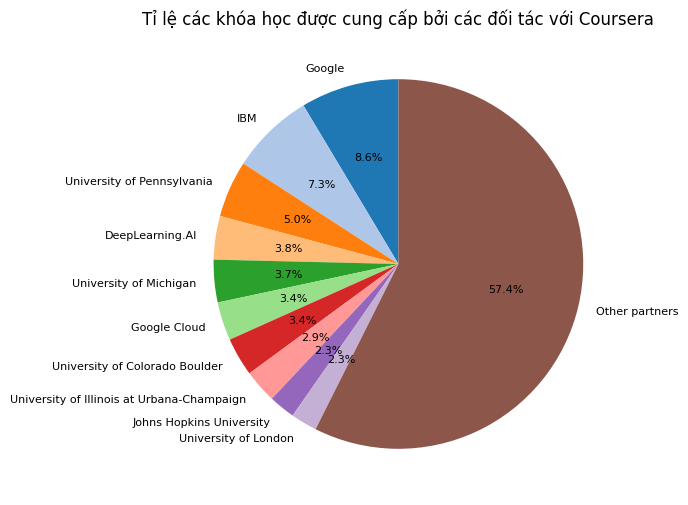

In [5]:
top_10_partners = partner_count.head(10)
# thêm 1 dòng để lưu thông tin cho các partner còn lại
# Tạo dòng mới
new_row = pd.DataFrame({
    'partner': ['Other partners'],
    'count': [partner_count['count'][10:].sum()]
    })
# Ghép dòng mới vào DataFrame
top_10_partners = pd.concat([top_10_partners, new_row], ignore_index=True)

plt.figure(figsize=(6,6))
palette_color = sns.color_palette('tab20')
plt.pie(top_10_partners['count'], 
        labels=top_10_partners['partner'], 
        colors=palette_color, 
        autopct='%.1f%%', 
        startangle=90, 
        textprops={'fontsize': 8}
        )
plt.title('Tỉ lệ các khóa học được cung cấp bởi các đối tác với Coursera')
plt.show()

Dựa trên biểu đồ, `Google` và `IBM` được xem là đối tác cung cấp lượng khóa học lớn nhất trên Coursera, các khóa học của những đối tác khác như `DeepLearnign.AI`,... chỉ bằng một nửa số lượng khóa học của 2 đối tác trên.

**Tiếp theo, ta cần chuẩn hóa cột skill của các khóa học để dễ dàng phân tích hơn.**

In [6]:
# điền vào các cell trống giá trị chuỗi rỗng
if df['skills'].isna().sum() != 0:
    df['skills'] = df['skills'].fillna('')
# chuyển kiểu chuỗi của cột 'skills' thành list
if not all(df['skills'].apply(lambda x: isinstance(x, list))):
    df['skills'] = [skill_list
                    .replace('{', '')
                    .replace('}', '')
                    .replace('"', '')
                    .split(',') for skill_list in df['skills']]

df['skills']

0       [ Network Security,  Python Programming,  Linu...
1       [ Data Analysis,  R Programming,  SQL,  Busine...
2       [ Project Management,  Strategy and Operations...
3       [ Digital Marketing,  Marketing,  Marketing Ma...
4       [ Computer Networking,  Network Architecture, ...
                              ...                        
1124                                                   []
1125    [ Strategy and Operations,  Leadership and Man...
1126    [ Machine Learning,  Python Programming,  R Pr...
1127                                                   []
1128    [ Accounting,  Finance,  General Statistics,  ...
Name: skills, Length: 1129, dtype: object

**Có vài khóa học đang có giá trị skills không đúng (vd: (5.7k reviews)). Vì vậy, ta loại bỏ các giá trị này trong cột `skills` của df.**

In [7]:
# thay các cell chứa giá trị lạ thành chuỗi rỗng
df['skills'] = [
    [skill.strip() if not re.search(r'\(\d+k| reviews\)', skill) else '' for skill in course] 
    for course in df['skills']
    ]

# kiểm tra cột đã hết lỗi hay chưa
if any(df['skills'].apply(lambda x: any(re.search(r'\(\d+k| reviews\)', skill) for skill in x))):
    print('Vẫn còn tồn tại các giá trị lạ.')
else:
    print('Không còn tồn tại các giá trị lạ trong cột skills.')

Không còn tồn tại các giá trị lạ trong cột skills.


**Tìm tổng số lượng skills cụ thể.**

In [8]:
# tìm các skills khác biệt
unique_skills = set(skill for course in df['skills'] for skill in course if skill)
print(f'Số lượng skills mà Coursera có thể cung cấp cho người học {len(unique_skills)}.')

Số lượng skills mà Coursera có thể cung cấp cho người học 342.


**Phân loại các khóa học theo từng nhóm ngành cụ thể.**

In [9]:
# tạo từ điển phân loại lưu các keywords của chủ đề cụ thể
categories_dict = {
    'Technology' :[
        'Cloud', 'Python', 'Programming', 'Machine Learning', 'Data', 'SQL', 
        'Linux', 'Computer', 'AI', 'Cyber', 'Security', 'Network', 'Software', 'DevOps'
    ],
    'Science': [
        'Statistics', 'Biostatistics', 'Mathematics', 'Physics', 'Chemistry', 
        'Research', 'Epidemiology', 'Neural', 'Bioinformatics'
    ],
    'Finance': [
        'Accounting', 'Budget', 'Investment', 'Financial', 'Tax', 
        'Audit', 'Procurement', 'Securities', 'Cash', 'Management'
    ],
    'Business': [
        'Leadership', 'Marketing', 'Sales', 'Management', 'HR', 
        'Business', 'Entrepreneurship', 'Customer', 'Operations', 'Planning'
    ],
    'Health': [
        'Health', 'Nutrition', 'Public Health', 'Clinical', 'Medical'
    ],
    'Society': [
        'Social', 'Human', 'Culture', 'Psychology'
    ],
}


In [10]:
# hàm phân loại skill
# xây dựng hàm phân loại dựa trên các keywords càng nhiều các 
# keywords thuộc về một chủ đề thì chủ đề đó là chủ đề chính của khóa học
def classify_skill(skill_list, cate = categories_dict):
    if len(skill_list) == 1 and skill_list[0] == '':
        return None
    cnt_cate = {cate_key: 0 for cate_key in cate.keys()}

    category_keywords = {
        word: category for category, keywords in cate.items() for word in keywords
        }

    for skill in skill_list:
        for word in skill.split():
            if word in category_keywords:
                cnt_cate[category_keywords[word]] += 1

    sorted_cnt = dict(sorted(cnt_cate.items(), key=lambda item: item[1], reverse=True))
    return list(sorted_cnt.keys())[0]

In [11]:
# thêm cột phân loại vào df 
df['Category'] = df['skills'].apply(lambda skills: classify_skill(skills, categories_dict))

In [12]:
df.head(5)

,Unnamed: 0,partner,course,skills,rating,reviewcount,level,certificatetype,duration,crediteligibility,Category
0,0,Google,Google Cybersecurity,"[Network Security, Python Programming, Linux, ...",4.8,16400.0,Beginner,Professional Certificate,3 - 6 Months,False,Technology
1,1,Google,Google Data Analytics,"[Data Analysis, R Programming, SQL, Business C...",4.8,133400.0,Beginner,Professional Certificate,3 - 6 Months,True,Technology
2,2,Google,Google Project Management:,"[Project Management, Strategy and Operations, ...",4.8,97300.0,Beginner,Professional Certificate,3 - 6 Months,True,Business
3,3,Google,Google Digital Marketing & E-commerce,"[Digital Marketing, Marketing, Marketing Manag...",4.8,21400.0,Beginner,Professional Certificate,3 - 6 Months,False,Business
4,4,Google,Google IT Support,"[Computer Networking, Network Architecture, Ne...",4.8,181400.0,Beginner,Professional Certificate,3 - 6 Months,True,Technology


**Trực quan tỷ lệ đóng góp của các phân loại.**

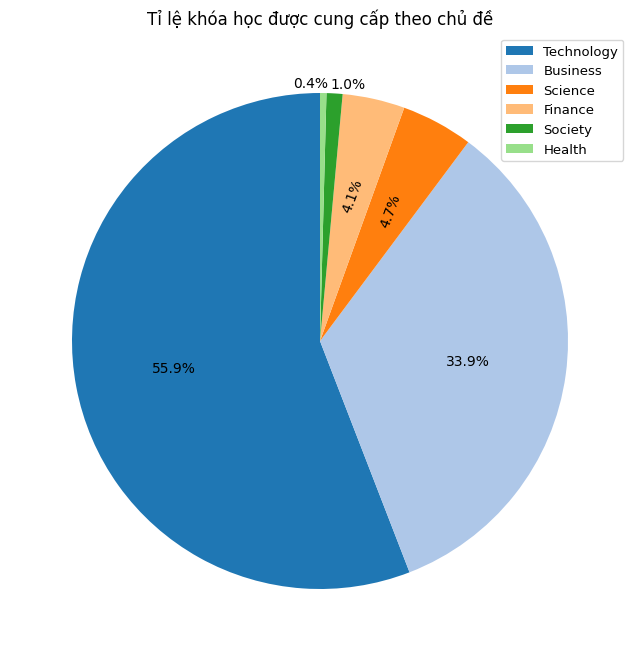

In [13]:
# đếm số lượng của mỗi phân loại
category_count = df['Category'].value_counts()

# vẽ pie chart
plt.figure(figsize=(8,8))
plt.axis('equal')
palette_color = sns.color_palette('tab20')
dges, texts, autotexts = plt.pie(
    category_count.values, 
    colors=palette_color, 
    autopct='%1.1f%%', startangle=90
    )
plt.title('Tỉ lệ khóa học được cung cấp theo chủ đề')
cnt = 0

# điều chỉnh vị trí %
for autotext in autotexts:
    percent = autotext.get_text()
    percent = float(percent[:-1])
    if 2 < percent < 10:
        autotext.set_rotation(70)
    elif percent <= 2:
        cnt += 1
        add = -0.05 if cnt % 2 ==0 else 0.05
        x, y = autotext.get_position()
        autotext.set_position((1.73 * x + add, 1.73 * y)) 

plt.legend(labels=category_count.index, loc='best', fontsize=9.5)
plt.show()

Ta có thể thấy phần lớn các khóa học trên Coursera là về chủ đề Công nghệ và Kinh doanh, các chủ đề còn lại chiếm phần trăm rất thấp (đặc biệt là Xã hội và Sức khỏe)

**Đếm số lượng khóa học theo chủ đề mà các đối tác cung cấp.**

In [14]:
partner_by_cate = df.groupby('Category')['partner'].value_counts().reset_index()
partner_by_cate

,Category,partner,count
0,Business,Google,33
1,Business,University of Pennsylvania,27
2,Business,"University of California, Irvine",13
3,Business,University of Virginia,13
4,Business,University of Illinois at Urbana-Champaign,11
...,...,...,...
246,Technology,University of Pittsburgh,1
247,Technology,University of Virginia,1
248,Technology,University of Virginia Darden School Foundation,1
249,Technology,Utrecht University,1


**Trực quan số lượng khóa học mà các đối tác cung cấp theo phân loại chủ đề.**

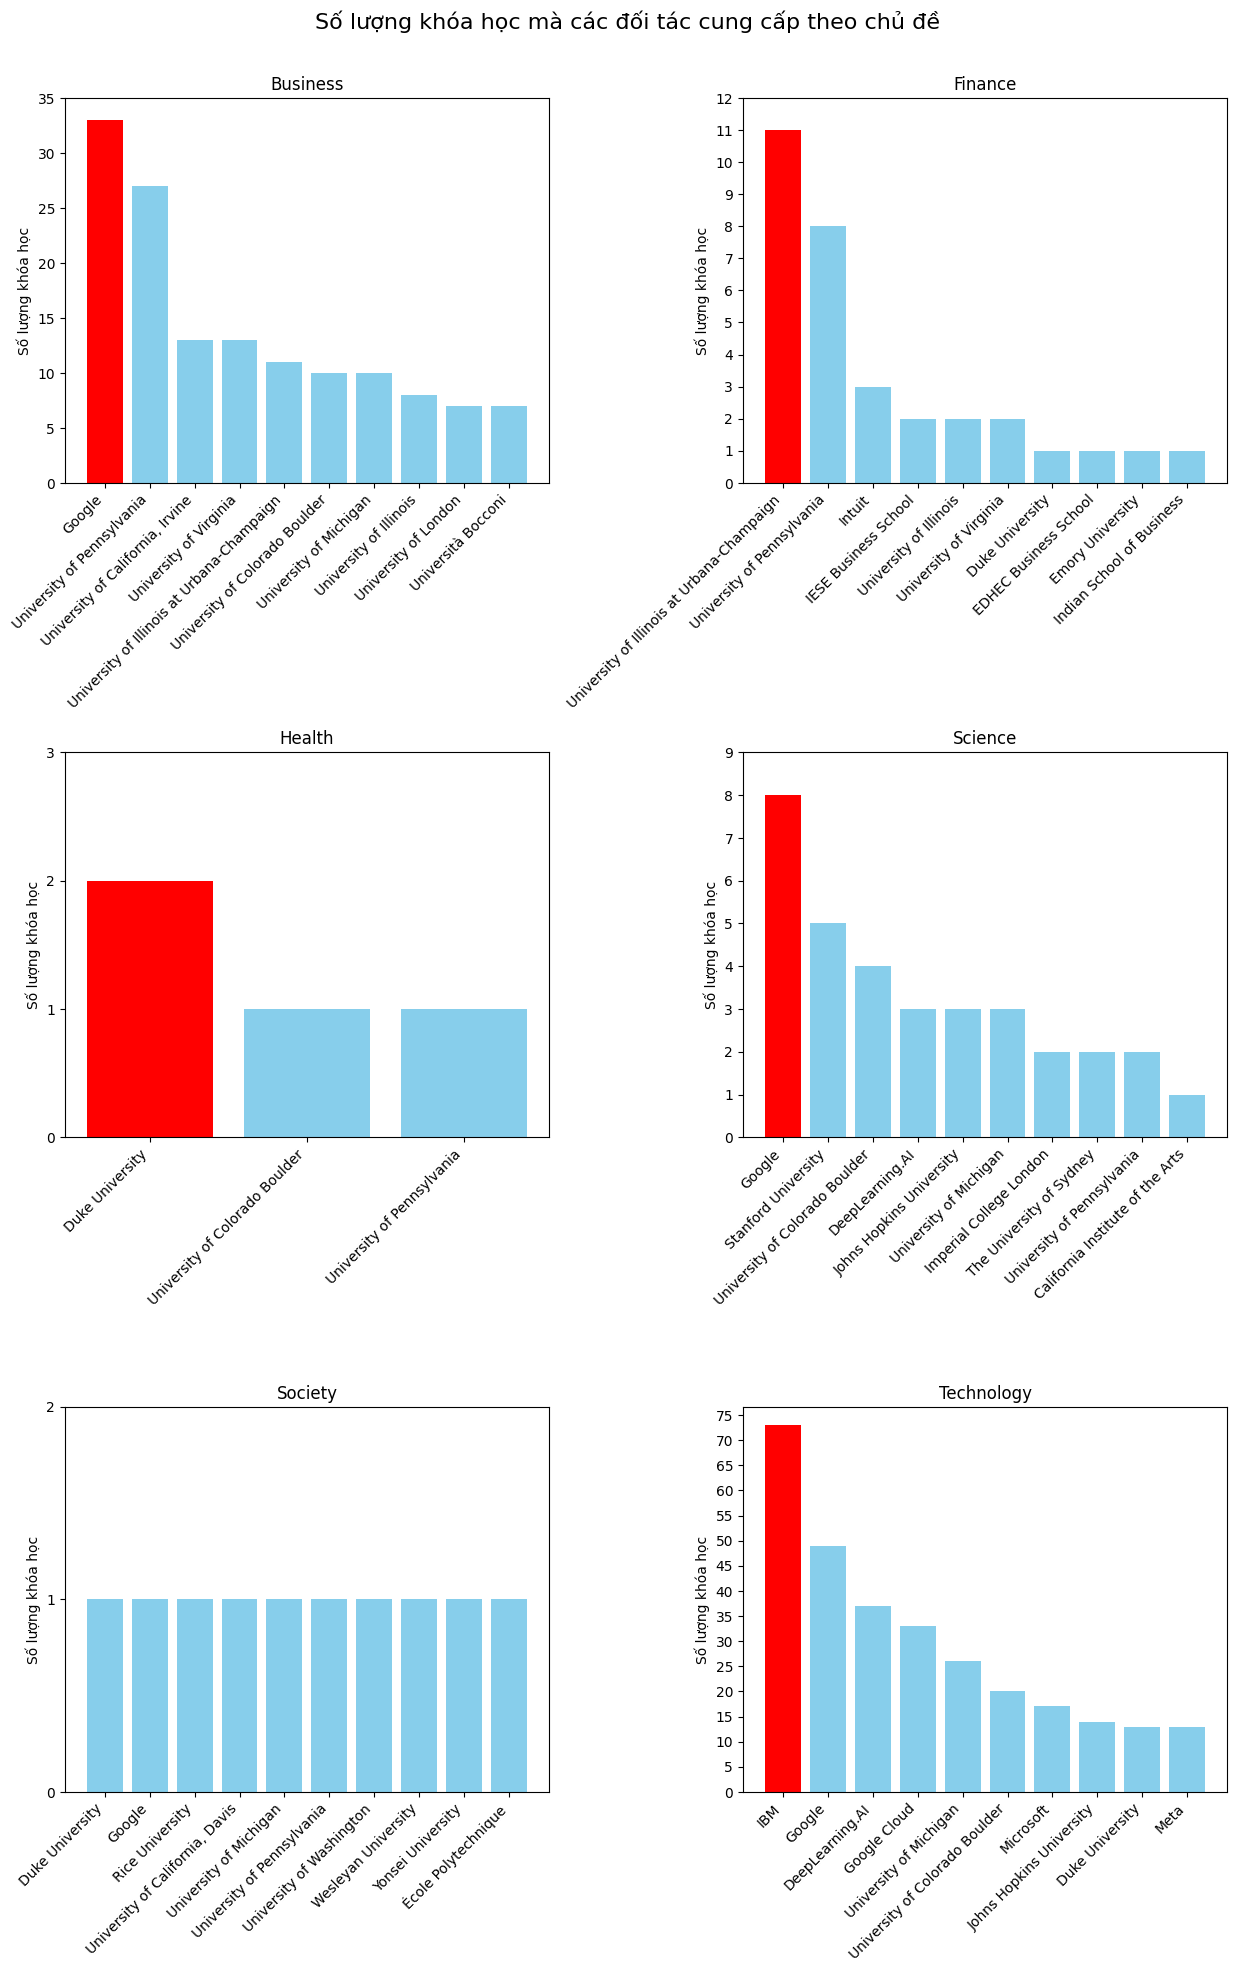

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(15, 22))  

for i, cate in enumerate(partner_by_cate['Category'].unique()):
    row, col = divmod(i, 2)
    data = partner_by_cate[partner_by_cate['Category'] == cate].head(10)
    max_value = max(data['count'])
    colors = ['red' if count == max_value and not all(data['count'].apply(lambda x: x == max_value)) 
              else 'skyblue' for count in data['count']]
    axes[row,col].bar(data['partner'], data['count'], color=colors)
    axes[row,col].set_title(cate)
    axes[row,col].set_ylabel('Số lượng khóa học')
    axes[row, col].set_xticks(range(len(data['partner'])))
    axes[row, col].set_xticklabels(data['partner'], rotation=45, ha='right')
     # Chỉ hiển thị số nguyên trên trục Y cho "Số lượng khóa học"
    y_min, y_max = axes[row, col].get_ylim()
    range_y = int(np.ceil(y_max)) + 1 - int(y_min)
    step = 5 if range_y >= 20 else 1
    axes[row, col].set_yticks(range(int(y_min), int(np.ceil(y_max) + 1),step))

plt.subplots_adjust(hspace=0.7, wspace=0.4)
fig.suptitle('Số lượng khóa học mà các đối tác cung cấp theo chủ đề', fontsize=16, y=0.92)
plt.show()

**Nhận xét**:
- Chủ đề Công nghệ (Technology) có số lượng khóa học cao nhất, với `IBM` và `Google` là các đối tác hàng đầu, cung cấp nhiều khóa học nhất (50-75). Các đối tác khác như `Duke University`, `Meta`,... có số lượng khóa học ít hơn đáng kể.
- Ngoài ra, `Google` còn cung cấp nhiều khóa học liên quan đến các chủ đề như Kinh doanh (Bussiness), Khoa học (Science),..
- `University of Illinois` là đối tác lớn nhất cung cấp các khóa học về Tài chính (Finance). Bên cạnh đó, cũng có một số đối tác như `University of Pennsylvania`, `Intuit`,... cũng tham gia vào chủ đề này nhưng với số lượng ít hơn.
- Có ít khóa học liên quan đến các chủ đề về Sức khỏe (Health), Xã hội (Society). Một số đối tác như `Duke University`, `University of Colorado Boulder` cung cấp 1-2 khóa học cho mỗi chủ đề.

#### Q2: <a id="q2"></a>

#### Q3: <a id="q3"></a>

#### Q4: <a id="q4"></a>